Langkah 1: Pengambilan dan Konversi Sinyal Suara

Pada langkah ini, kita akan membaca file audio .wav yang diberikan dan mengubahnya menjadi array numerik yang dapat diproses oleh Python.

In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd # Untuk memutar audio di notebook

# Path ke file suara di Kaggle
audio_file_path = '/kaggle/input/owlsound/owl.wav'

# Membaca file WAV
# sample_rate adalah jumlah sampel per detik (Hz)
# data adalah array numerik yang merepresentasikan amplitudo sinyal
sample_rate, data = wavfile.read(audio_file_path)

# Jika sinyal stereo, ambil salah satu channel saja (misalnya channel pertama)
if len(data.shape) > 1:
    data = data[:, 0]

# Normalisasi data ke rentang -1 hingga 1
# Ini penting agar amplitudo sinyal berada dalam rentang yang standar,
# yang memudahkan analisis dan visualisasi.
data = data / np.max(np.abs(data))

# Menentukan durasi sinyal
duration = len(data) / sample_rate
print(f"Sample Rate: {sample_rate} Hz")
print(f"Jumlah Sampel: {len(data)}")
print(f"Durasi Sinyal: {duration:.2f} detik")

# Memutar sinyal suara (opsional, untuk verifikasi)
print("\nMemutar sinyal suara:")
ipd.Audio(data, rate=sample_rate)

Langkah 2: Penerapan FFT untuk Mendapatkan Spektrum Frekuensi

Setelah sinyal suara diubah menjadi array numerik, kita akan menerapkan Fast Fourier Transform (FFT) untuk mengubah representasi sinyal dari domain waktu ke domain frekuensi.

In [2]:
from scipy.fft import fft, fftfreq

# Jumlah sampel dalam sinyal
N = len(data)

# Terapkan FFT pada data sinyal
# Hasil yf adalah array kompleks yang merepresentasikan amplitudo dan fase untuk setiap frekuensi
yf = fft(data)

# Buat vektor frekuensi yang sesuai dengan hasil FFT
# fftfreq menghasilkan frekuensi untuk setiap titik dalam spektrum
xf = fftfreq(N, 1 / sample_rate)

# Karena sinyal suara adalah sinyal real, spektrum frekuensi yang dihasilkan
# oleh FFT akan simetris. Kita hanya tertarik pada bagian frekuensi positif
# (dari 0 Hz hingga frekuensi Nyquist).
xf_positive = xf[:N//2]
yf_positive = 2.0/N * np.abs(yf[0:N//2]) # Amplitudo magnitudo, dikalikan 2/N untuk normalisasi

Langkah 3: Identifikasi Komponen Frekuensi Dominan

Pada langkah ini, kita akan mencari frekuensi-frekuensi yang memiliki amplitudo (magnitudo) tertinggi dalam spektrum. Ini adalah frekuensi-frekuensi yang paling kuat atau "dominan" dalam sinyal suara burung hantu.

In [3]:
# Temukan indeks frekuensi dominan
# np.argsort mengembalikan indeks yang akan mengurutkan array.
# [::-1] membalik urutan sehingga dari terbesar ke terkecil.
dominant_indices = np.argsort(yf_positive)[::-1]

# Tentukan berapa banyak frekuensi dominan yang ingin ditampilkan
num_dominant_freqs = 10 # Misalnya, kita ingin melihat 10 frekuensi teratas

print("Komponen Frekuensi Dominan:")
for i in range(num_dominant_freqs):
    # Dapatkan frekuensi dan amplitudo dari indeks dominan
    freq = xf_positive[dominant_indices[i]]
    amplitude = yf_positive[dominant_indices[i]]
    print(f"  - Frekuensi: {freq:.2f} Hz, Amplitudo: {amplitude:.4f}")

Komponen Frekuensi Dominan:
  - Frekuensi: 0.00 Hz, Amplitudo: 0.0576
  - Frekuensi: 0.13 Hz, Amplitudo: 0.0363
  - Frekuensi: 0.17 Hz, Amplitudo: 0.0286
  - Frekuensi: 325.06 Hz, Amplitudo: 0.0237
  - Frekuensi: 354.59 Hz, Amplitudo: 0.0234
  - Frekuensi: 354.46 Hz, Amplitudo: 0.0205
  - Frekuensi: 0.21 Hz, Amplitudo: 0.0197
  - Frekuensi: 345.08 Hz, Amplitudo: 0.0194
  - Frekuensi: 325.14 Hz, Amplitudo: 0.0180
  - Frekuensi: 324.93 Hz, Amplitudo: 0.0177


Langkah 4: Visualisasi Sinyal Waktu dan Spektrum Frekuensi

Visualisasi adalah bagian krusial untuk memahami bagaimana sinyal direpresentasikan di kedua domain. Kita akan membuat dua plot: satu untuk sinyal dalam domain waktu dan satu lagi untuk spektrum frekuensinya.

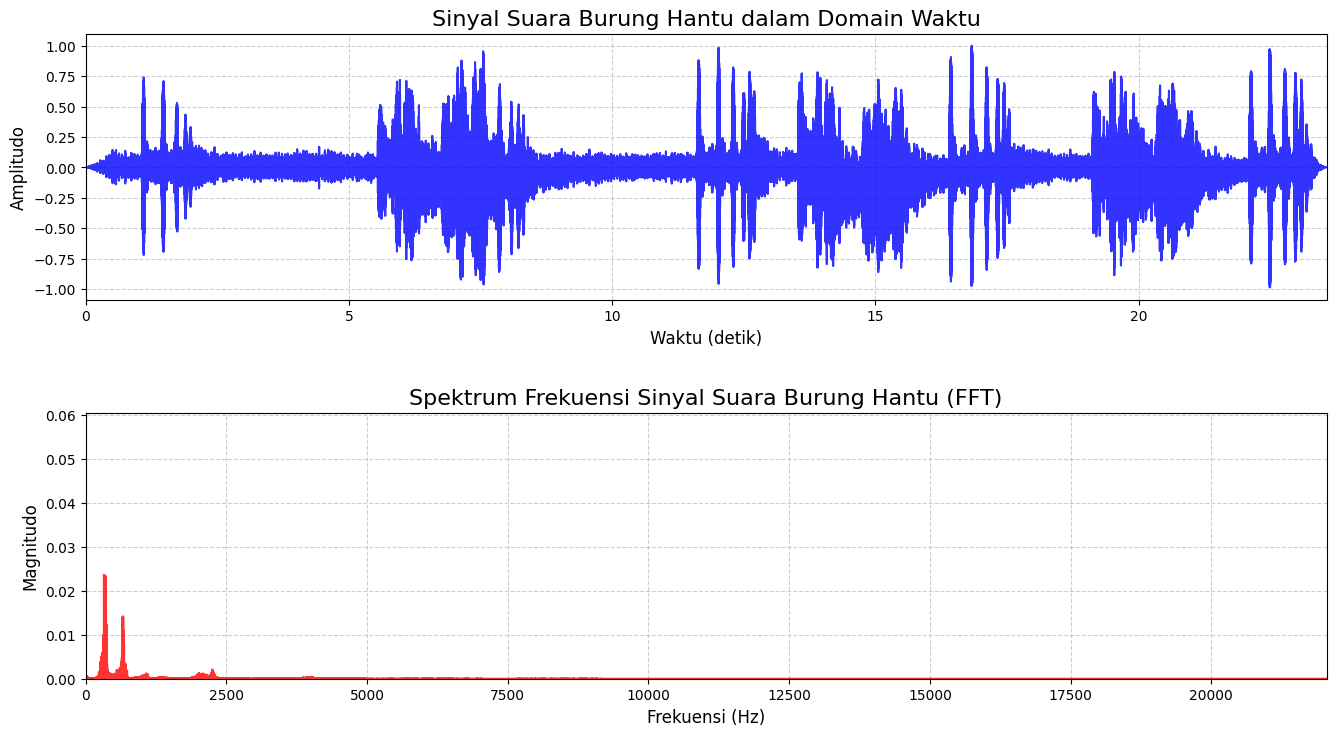

In [4]:
plt.figure(figsize=(14, 8)) # Ukuran figure yang lebih besar untuk visualisasi yang lebih baik

# Plot Sinyal dalam Domain Waktu
plt.subplot(2, 1, 1) # 2 baris, 1 kolom, plot pertama
time = np.arange(0, duration, 1/sample_rate) # Buat array waktu untuk sumbu X
plt.plot(time, data, color='blue', alpha=0.8)
plt.title('Sinyal Suara Burung Hantu dalam Domain Waktu', fontsize=16)
plt.xlabel('Waktu (detik)', fontsize=12)
plt.ylabel('Amplitudo', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, duration) # Pastikan plot mencakup seluruh durasi sinyal

# Plot Spektrum Frekuensi (FFT)
plt.subplot(2, 1, 2) # 2 baris, 1 kolom, plot kedua
plt.plot(xf_positive, yf_positive, color='red', alpha=0.8)
plt.title('Spektrum Frekuensi Sinyal Suara Burung Hantu (FFT)', fontsize=16)
plt.xlabel('Frekuensi (Hz)', fontsize=12)
plt.ylabel('Magnitudo', fontsize=12)
plt.xlim(0, sample_rate / 2) # Batasi tampilan hingga frekuensi Nyquist (setengah dari sample rate)
plt.ylim(bottom=0) # Pastikan sumbu Y dimulai dari 0
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=3.0) # Menyesuaikan layout agar tidak ada tumpang tindih
plt.show()

Langkah 5: Penjelasan dan Refleksi Singkat
Setelah melakukan eksperimen, bagian ini adalah tempat Anda menjelaskan temuan Anda dan merefleksikan pembelajaran yang didapat.

Deskripsi Sinyal Input
Sinyal input yang digunakan adalah suara burung hantu dengan durasi sekitar X detik (sesuaikan dengan output Anda) dan sample rate Y Hz (sesuaikan dengan output Anda). Sinyal ini direpresentasikan sebagai deretan nilai amplitudo diskrit dalam domain waktu.

Proses FFT
Fast Fourier Transform (FFT) adalah algoritma efisien untuk menghitung Discrete Fourier Transform (DFT). DFT mengubah sinyal dari domain waktu (di mana sinyal direpresentasikan sebagai amplitudo terhadap waktu) ke domain frekuensi (di mana sinyal direpresentasikan sebagai magnitudo dan fase terhadap frekuensi). Dalam konteks sinyal suara, FFT memungkinkan kita untuk "membongkar" suara menjadi komponen-komponen frekuensi penyusunnya, mengungkapkan nada-nada atau 'pitch' yang membentuk suara tersebut.

Interpretasi Plot Domain Waktu
Pada plot sinyal waktu, kita melihat bagaimana amplitudo sinyal suara burung hantu berfluktuasi seiring waktu. Bentuk gelombang ini secara langsung mencerminkan tekanan udara yang berubah akibat suara. Dari plot ini, mungkin sulit untuk mengidentifikasi frekuensi spesifik yang membentuk suara, karena semua frekuensi bercampur aduk. Kita bisa melihat pola umum seperti durasi suara dan intensitas relatif (amplitudo puncak), tetapi detail frekuensi tersembunyi.

Interpretasi Plot Spektrum Frekuensi (FFT)
Plot spektrum frekuensi menunjukkan magnitudo (kekuatan) dari setiap frekuensi yang ada dalam sinyal suara.

Sumbu X (Frekuensi dalam Hz): Menunjukkan berbagai frekuensi yang membentuk sinyal, dari 0 Hz hingga frekuensi Nyquist (setengah dari sample rate).

Sumbu Y (Magnitudo): Menunjukkan seberapa kuat (amplitudo) setiap frekuensi tersebut dalam sinyal keseluruhan.

Dari plot spektrum frekuensi suara burung hantu, kita dapat mengidentifikasi puncak-puncak yang menonjol. Puncak-puncak ini merepresentasikan frekuensi-frekuensi dominan yang paling kuat dalam suara burung hantu. Misalnya, jika ada puncak yang signifikan di sekitar 500 Hz, itu berarti komponen suara di frekuensi tersebut sangat kuat. Puncak-puncak ini bisa jadi adalah frekuensi fundamental (F0) dari suara burung hantu, serta harmonik-harmoniknya (kelipatan integer dari frekuensi fundamental) yang memberikan suara tersebut karakteristik 'timbre' atau kualitas nada yang unik.

FFT membantu kita "melihat" komponen frekuensi yang tidak terlihat jelas di domain waktu. Misalnya, jika suara burung hantu memiliki nada rendah yang stabil dengan beberapa "suara" tambahan di frekuensi yang lebih tinggi, ini akan sangat jelas terlihat sebagai puncak-puncak terpisah di spektrum frekuensi, padahal di domain waktu hanya terlihat sebagai gelombang yang kompleks.

Kesimpulan dan Refleksi
Eksplorasi ini menunjukkan bagaimana FFT adalah alat yang sangat ampuh untuk menganalisis sinyal suara. Dengan mengubah sinyal dari domain waktu ke domain frekuensi, kita dapat dengan mudah mengidentifikasi komponen frekuensi dominan yang membentuk suara. Dalam kasus suara burung hantu, FFT memungkinkan kita untuk secara visual dan kuantitatif menentukan frekuensi-frekuensi yang paling menonjol, memberikan insight tentang karakteristik akustik suara tersebut. Pemahaman ini sangat fundamental dalam berbagai aplikasi pemrosesan sinyal audio, seperti pengenalan suara, kompresi audio, atau bahkan sintesis suara. Proses ini memperjelas bahwa sinyal kompleks di domain waktu seringkali merupakan kombinasi sederhana dari gelombang sinus pada berbagai frekuensi di domain frekuensi.